# Michelin Rated Restaurants in France - Visualisation

In [1]:
# Module import
import pandas as pd
import geopandas as gpd

In [2]:
# Function import
from Functions.functions_visualisation import (dataframe_info, filter_dataframe,
                                               top_restaurants, plot_choropleth, plot_area_info)

Importing the processed data

In [3]:
# All restaurants
all_france = pd.read_csv("../../data/France/all_restaurants(arrondissements).csv")

----
&nbsp;
### `dataframe_info` function

Provides concise information about a given dataframe

Arguments:

`data` (pandas.DataFrame or gpd.GeoDataFrame): 

the function prints out concise details about the dataframe.

In [4]:
dataframe_info(all_france)

Unique Regions: 13
Unique Departments: 96
Unique Arrondissements: 307
Unique Locations: 1468

Shape: (2985, 16)


,name,address,location,arrondissement,department_num,department,capital,region,price,cuisine,url,award,stars,greenstar,longitude,latitude
0,L'Ambroisie,9 place des Vosges,"Paris, 75004",4th (Hôtel-de-Ville),75,Paris,Paris,Île-de-France,€€€€,Classic Cuisine,https://www.ambroisie-paris.com/,3 Stars,3.0,0,2.364521,48.855494
1,Flocons de Sel,"1775 route du Leutaz, Le Leutaz","Megève, 74120",Bonneville,74,Haute-Savoie,Annecy,Auvergne-Rhône-Alpes,€€€€,Modern Cuisine,https://www.floconsdesel.com,3 Stars,3.0,0,6.596963,45.830240
2,Épicure,"Le Bristol, 112 rue du Faubourg-Saint-Honoré","Paris, 75008",8th (Élysée),75,Paris,Paris,Île-de-France,€€€€,Modern Cuisine,https://www.oetkercollection.com/fr/hotels/le-...,3 Stars,3.0,0,2.314598,48.871722


---

### `filter_dataframe` function

Filters a dataframe based on specific regions, departments and arrondissements either for inclusion or exclusion.

**Arguments**:

- `data` (pandas.DataFrame): The primary dataframe to filter.
- `regions` (list[str]/str, optional): Targeted region(s) to include.
- `departments` (list[str]/str, optional): Targeted department(s) to include.
- `arrondissements` (list[str]/str, optional): Arrondissement(s) to include.
- `exclude_regions` (list[str]/str, optional): Region(s) to exclude.
- `exclude_departments` (list[str]/str, optional): Department(s) to exclude.
- `exclude_arrondissements` (list[str]/str, optional): Arrondissement(s) to exclude

**Returns**:

- pandas.DataFrame: The dataframe after applying filters.

##### Usage:

To include or exclude specific regions or departments, provide lists or single strings to the appropriate parameters. For example:

- For specific regions: `regions=['Region1', 'Region2']`
- To exclude departments: `exclude_departments='DepartmentX'`

The function ensures consistent filtering even with minor discrepancies in naming, thanks to the `_get_best_match` helper function.

---

In [5]:
# We define Paris, 75
paris = filter_dataframe(all_france, departments='Paris')
dataframe_info(paris)

Unique Regions: 1
Unique Departments: 1
Unique Arrondissements: 20
Unique Locations: 21

Shape: (460, 16)


,name,address,location,arrondissement,department_num,department,capital,region,price,cuisine,url,award,stars,greenstar,longitude,latitude
0,L'Ambroisie,9 place des Vosges,"Paris, 75004",4th (Hôtel-de-Ville),75,Paris,Paris,Île-de-France,€€€€,Classic Cuisine,https://www.ambroisie-paris.com/,3 Stars,3.0,0,2.364521,48.855494
2,Épicure,"Le Bristol, 112 rue du Faubourg-Saint-Honoré","Paris, 75008",8th (Élysée),75,Paris,Paris,Île-de-France,€€€€,Modern Cuisine,https://www.oetkercollection.com/fr/hotels/le-...,3 Stars,3.0,0,2.314598,48.871722
3,Arpège,84 rue de Varenne,"Paris, 75007",7th (Palais-Bourbon),75,Paris,Paris,Île-de-France,€€€€,Creative,https://www.alain-passard.com/,3 Stars,3.0,1,2.317013,48.855754


We can be somewhat imprecise with spelling

In [6]:
# Exclude Île-de-France
rest_of_france = filter_dataframe(all_france, exclude_regions='ile de france')
dataframe_info(rest_of_france)

Unique Regions: 12
Unique Departments: 88
Unique Arrondissements: 265
Unique Locations: 1392

Shape: (2448, 16)


,name,address,location,arrondissement,department_num,department,capital,region,price,cuisine,url,award,stars,greenstar,longitude,latitude
1,Flocons de Sel,"1775 route du Leutaz, Le Leutaz","Megève, 74120",Bonneville,74,Haute-Savoie,Annecy,Auvergne-Rhône-Alpes,€€€€,Modern Cuisine,https://www.floconsdesel.com,3 Stars,3.0,0,6.596963,45.830240
6,Le Petit Nice,Anse de Maldormé,"Marseille, 13007",Marseille,13,Bouches-du-Rhône,Marseille,Provence-Alpes-Côte d'Azur,€€€€,Seafood,https://www.passedat.fr,3 Stars,3.0,0,5.352048,43.280257
8,L'Oustau de Baumanière,Mas de Baumanière,"Les Baux-de-Provence, 13520",Arles,13,Bouches-du-Rhône,Marseille,Provence-Alpes-Côte d'Azur,€€€€,Creative,http://www.baumaniere.com,3 Stars,3.0,1,4.787363,43.740266


In [7]:
# Define 'South of France'
# Capitalisation (or lack of) doesn't matter
south = filter_dataframe(all_france, regions=['Provence', 'aquitaine', 'occitanie', 'auvergne rhone alpes'])
dataframe_info(south)

Unique Regions: 4
Unique Departments: 43
Unique Arrondissements: 126
Unique Locations: 732

Shape: (1377, 16)


,name,address,location,arrondissement,department_num,department,capital,region,price,cuisine,url,award,stars,greenstar,longitude,latitude
1,Flocons de Sel,"1775 route du Leutaz, Le Leutaz","Megève, 74120",Bonneville,74,Haute-Savoie,Annecy,Auvergne-Rhône-Alpes,€€€€,Modern Cuisine,https://www.floconsdesel.com,3 Stars,3.0,0,6.596963,45.830240
6,Le Petit Nice,Anse de Maldormé,"Marseille, 13007",Marseille,13,Bouches-du-Rhône,Marseille,Provence-Alpes-Côte d'Azur,€€€€,Seafood,https://www.passedat.fr,3 Stars,3.0,0,5.352048,43.280257
8,L'Oustau de Baumanière,Mas de Baumanière,"Les Baux-de-Provence, 13520",Arles,13,Bouches-du-Rhône,Marseille,Provence-Alpes-Côte d'Azur,€€€€,Creative,http://www.baumaniere.com,3 Stars,3.0,1,4.787363,43.740266


----
&nbsp;
## Michelin Stars by arrondissement, department and region

### `top_restaurants` function

Lists areas with the highest count of Michelin-starred restaurants based on a specified granularity.

**Arguments**:

- `data` (pandas.DataFrame): Contains restaurant details.
- `granularity` (str): Specifies granularity: 'region', 'department', or 'arrondissement'.
- `star_rating` (int): Michelin star rating (1, 2, or 3).
- `top_n` (int): Number of top areas to display.
- `display_restaurants` (bool, default=True): If True, shows names and locations of restaurants.
- `display_info` (bool, default=False): If True, provides additional details for each restaurant.

**Behavior**:

1. **Ranking**: Lists top areas based on count of Michelin-starred restaurants.
2. **Restaurant Details**: If `display_restaurants` is True, lists restaurants in each area. Additional details shown if `display_info` is True.

#### By Region

In [8]:
top_restaurants(rest_of_france, granularity='region', star_rating=3, top_n=3)

Top 3 regions with most ⭐⭐⭐ restaurants:


Region: Provence-Alpes-Côte d'Azur
7 ⭐⭐⭐ Restaurants





Region: Auvergne-Rhône-Alpes
6 ⭐⭐⭐ Restaurants





Region: Nouvelle-Aquitaine
2 ⭐⭐⭐ Restaurants




### By Department

In [9]:
top_restaurants(south, granularity='department', star_rating=3, top_n=3, display_restaurants=False)

Top 3 departments with most ⭐⭐⭐ restaurants:


Department: Bouches-du-Rhône
4 ⭐⭐⭐ Restaurants


Department: Haute-Savoie
2 ⭐⭐⭐ Restaurants


Department: Var
2 ⭐⭐⭐ Restaurants




### By *Arrondissement*

In [10]:
# We choose an out of bounds 'top_n'
paca = filter_dataframe(all_france, regions='Provence')
top_restaurants(paca, granularity='arrondissement', star_rating=3, top_n=5, display_restaurants=False)

Top 5 arrondissements with most ⭐⭐⭐ restaurants:


Arrondissement: Marseille
3 ⭐⭐⭐ Restaurants


Arrondissement: Arles
1 ⭐⭐⭐ Restaurant


Arrondissement: Draguignan
1 ⭐⭐⭐ Restaurant


Arrondissement: Nice
1 ⭐⭐⭐ Restaurant


Arrondissement: Toulon
1 ⭐⭐⭐ Restaurant




----
&nbsp;
## Loading Geographical Data

The below GeoDataFrames contain Michelin restaurant counts, statistics and geographical data for each regional level

In [11]:
# Load GeoJSON arrondissement data
arrondissements = gpd.read_file("../../data/France/geodata/arrondissement_restaurants.geojson")
dataframe_info(arrondissements)

GeoDataFrame.
Unique Regions: 13
Unique Departments: 96
Unique Arrondissements: 320

Shape: (320, 20)


,code,arrondissement,department_num,department,capital,region,selected,bib_gourmand,1_star,2_star,3_star,total_stars,starred_restaurants,green_stars,municipal_population,population_density(inhabitants/sq_km),poverty_rate(%),average_net_hourly_wage(€),locations,geometry
0,01001,Belley,01,Ain,Bourg-en-Bresse,Auvergne-Rhône-Alpes,1,0,1,0,0,1,1,0,126468.0,78.8,10.1,15.98,"{1: [(46.0070045, 5.3605085)], 2: None, 3: None}","POLYGON ((5.12174 45.81118, 5.12665 45.81392, ..."
1,01002,Bourg-en-Bresse,01,Ain,Bourg-en-Bresse,Auvergne-Rhône-Alpes,12,6,2,1,0,4,3,1,345948.0,119.2,9.1,16.31,"{1: [(46.2987913, 4.8826914), (46.4340961, 4.9...","POLYGON ((4.98022 46.5152, 4.98355 46.51539, 4..."
2,01003,Gex,01,Ain,Bourg-en-Bresse,Auvergne-Rhône-Alpes,3,0,0,0,0,0,0,0,104770.0,252.0,12.4,15.82,"{1: None, 2: None, 3: None}","POLYGON ((6.06401 46.41623, 6.0673 46.41494, 6..."


In [12]:
# Load GeoJSON departmental data
departments = gpd.read_file("../../data/France/geodata/department_restaurants.geojson")
dataframe_info(departments)

GeoDataFrame.
Unique Regions: 13
Unique Departments: 96

Shape: (96, 22)


,code,department,capital,region,selected,bib_gourmand,1_star,2_star,3_star,total_stars,...,GDP_millions(€),GDP_per_capita(€),poverty_rate(%),average_annual_unemployment_rate(%),average_net_hourly_wage(€),municipal_population,population_density(inhabitants/sq_km),area(sq_km),locations,geometry
0,01,Ain,Bourg-en-Bresse,Auvergne-Rhône-Alpes,16,7,4,1,0,6,...,16726.40,24916.84,10.8,5.5,15.96,671289.0,115.1,5832.22,"{'Selected': [(45.7358533, 5.7079944), (46.305...","POLYGON ((4.78021 46.17668, 4.78024 46.18905, ..."
1,02,Aisne,Laon,Hauts-de-France,3,0,2,0,0,2,...,12016.40,22864.08,18.8,10.5,14.46,525558.0,71.7,7329.96,"{'Selected': [(49.5694557, 3.6221072), (49.615...","POLYGON ((3.17296 50.01131, 3.17382 50.01186, ..."
2,03,Allier,Moulins,Auvergne-Rhône-Alpes,8,4,2,0,0,2,...,8278.98,24734.42,16.2,7.8,14.19,334715.0,45.6,7340.24,"{'Selected': [(46.54767, 2.980203), (46.323322...","POLYGON ((3.03207 46.79491, 3.03424 46.7908, 3..."


In [13]:
# Load GeoJSON regional data
regions = gpd.read_file("../../data/France/geodata/region_restaurants.geojson")
dataframe_info(regions)

GeoDataFrame.
Unique Regions: 13

Shape: (13, 19)


,region,selected,bib_gourmand,1_star,2_star,3_star,total_stars,starred_restaurants,green_stars,GDP_millions(€),GDP_per_capita(€),poverty_rate(%),average_annual_unemployment_rate(%),average_net_hourly_wage(€),municipal_population,population_density(inhabitants/sq_km),area(sq_km),locations,geometry
0,Île-de-France,359,39,112,17,10,176,139,11,700754.40,56599.340730,16.148741,7.023389,21.275977,12380964.0,1021.03,12125.93,"{'Selected': [(48.8620352, 2.3510841), (48.879...","POLYGON ((2.59052 49.07965, 2.63327 49.10838, ..."
1,Centre-Val de Loire,79,17,20,1,0,22,21,5,72707.28,28163.683178,13.465104,6.831572,15.411722,2581597.0,65.79,39238.50,"{'Selected': [(46.8114663, 1.6908734), (46.810...","POLYGON ((2.87463 47.52042, 2.88845 47.50943, ..."
2,Bourgogne-Franche-Comté,115,21,27,4,1,38,32,6,76921.54,27433.013894,13.402493,6.416168,14.928133,2803977.0,58.64,47820.55,"{'Selected': [(47.2387368, 4.9677757), (47.322...","POLYGON ((3.62942 46.74946, 3.57569 46.74952, ..."


---

### `plot_choropleth` function

Displays a choropleth map from a provided dataset.

**Arguments**:

- `df` (GeoDataFrame): The DataFrame with geospatial data.
- `column` (str): Column to visualize.
- `title` (str): Map title.
- `granularity` (str): Geographical scale - 'region', 'department', or 'arrondissement'. Default is 'department'.
- `restaurants` (bool): Overlay restaurant locations. Default is False.
- `show_legend` (bool): Display legend. Default is True.
- `cmap` (str): Choropleth colormap. Default is 'Blues'.
- `figsize` (tuple): Map size. Default is (10, 10).

The function checks for column existence and numerical type. It can label regions, departments, or arrondissements based on granularity.

---

##### We choose numerical column `population_density(inhabitants/sq_km)`

## All France

In [14]:
# We make a 'column' error. This returns a list of suitable columns
plot_choropleth(regions, column='population_density', title='Population Density (inhabitants/sq_km)', granularity='region', show_legend=False)

ValueError: The column 'population_density' does not exist in the DataFrame. Available numerical columns are:

['selected', 'bib_gourmand', '1_star', '2_star', '3_star', 'total_stars', 'starred_restaurants', 'green_stars', 'GDP_millions(€)', 'GDP_per_capita(€)', 'poverty_rate(%)', 'average_annual_unemployment_rate(%)', 'average_net_hourly_wage(€)', 'municipal_population', 'population_density(inhabitants/sq_km)', 'area(sq_km)']

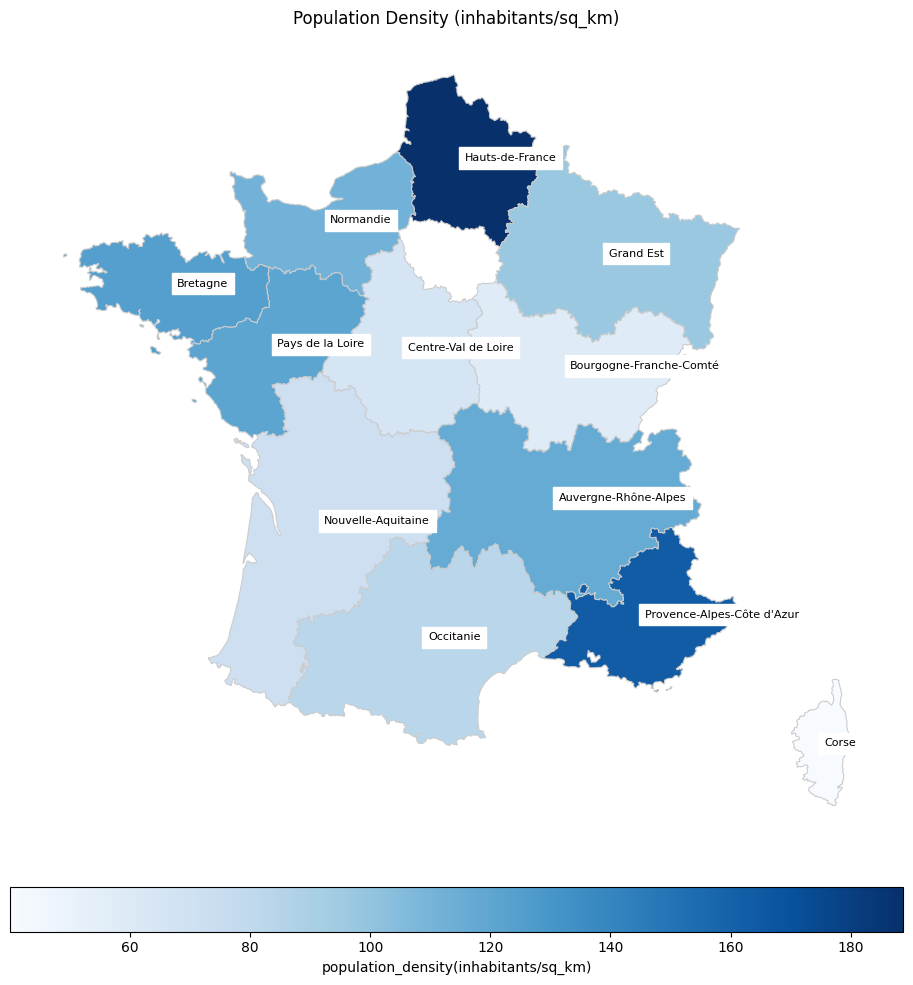

In [15]:
# We exclude Île-de-France
no_ile_de_france = filter_dataframe(regions, exclude_regions='ile de france')

plot_choropleth(no_ile_de_france, column='population_density(inhabitants/sq_km)',
                title='Population Density (inhabitants/sq_km)', granularity='region',
                show_legend=False)

----
&nbsp;
## Regions

### Auvergne-Rhône-Alpes

By Department

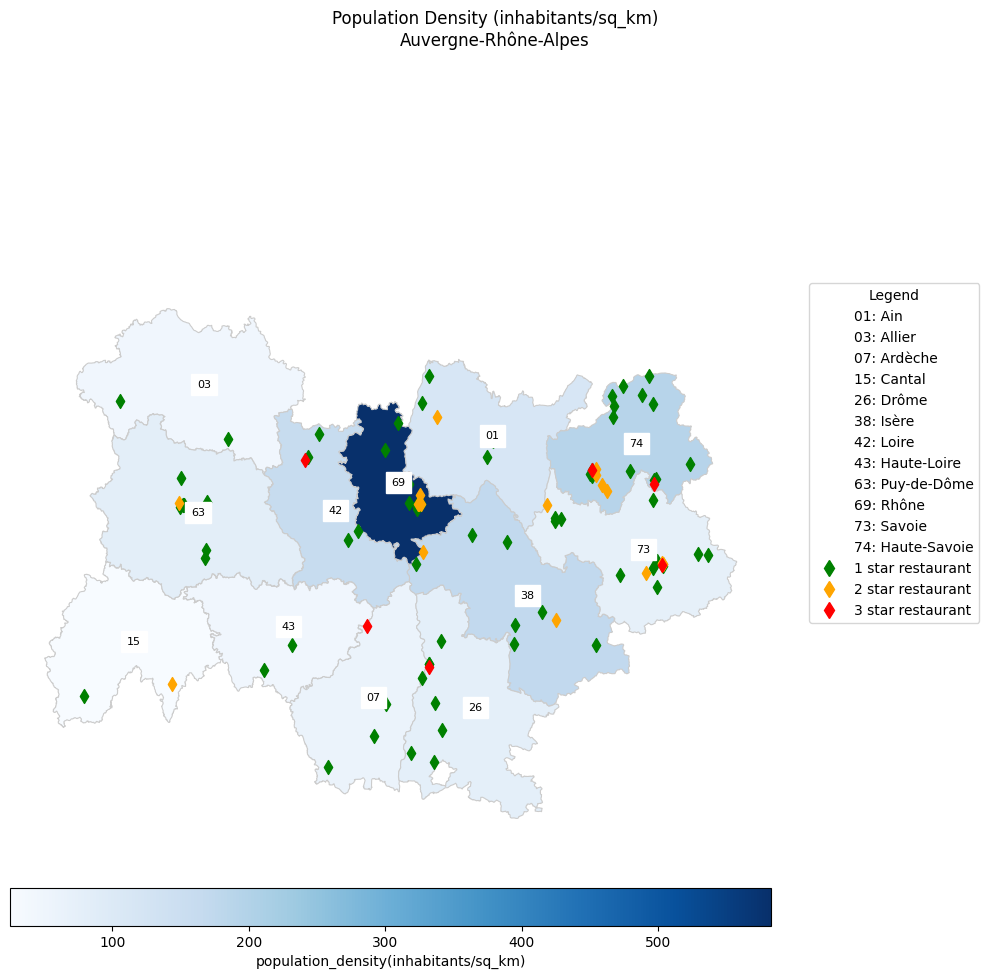

In [16]:
rhone_dept = filter_dataframe(departments, regions='auvergne rhone alpes')
plot_choropleth(rhone_dept, column='population_density(inhabitants/sq_km)', title='Population Density (inhabitants/sq_km)', granularity='department', restaurants=True, show_legend=True)

By *Arrondissement*

Removing Lyon Metropole

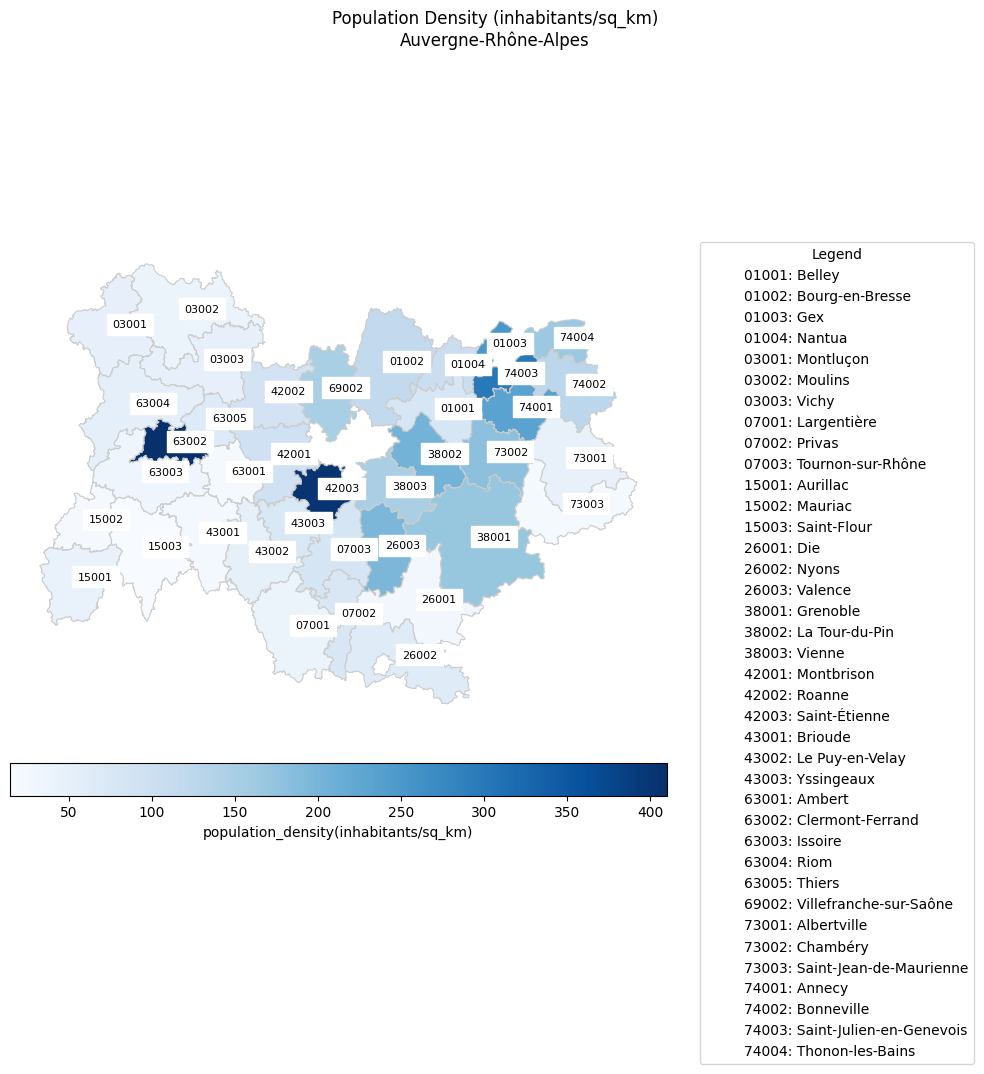

In [17]:
# Isolate Auvergne-Rhône-Alpes
rhone_arron = filter_dataframe(arrondissements, regions='auvergne rhone alpes')

# Remove Lyon
rhone_no_lyon = filter_dataframe(rhone_arron, exclude_arrondissements='lyon')

plot_choropleth(rhone_no_lyon, column='population_density(inhabitants/sq_km)', title='Population Density (inhabitants/sq_km)', granularity='arrondissement', restaurants=False, show_legend=True)

##### If the region is large (as above), creating smaller groups of departments will produce a less cluttered graph

#### Zoom in Savoie

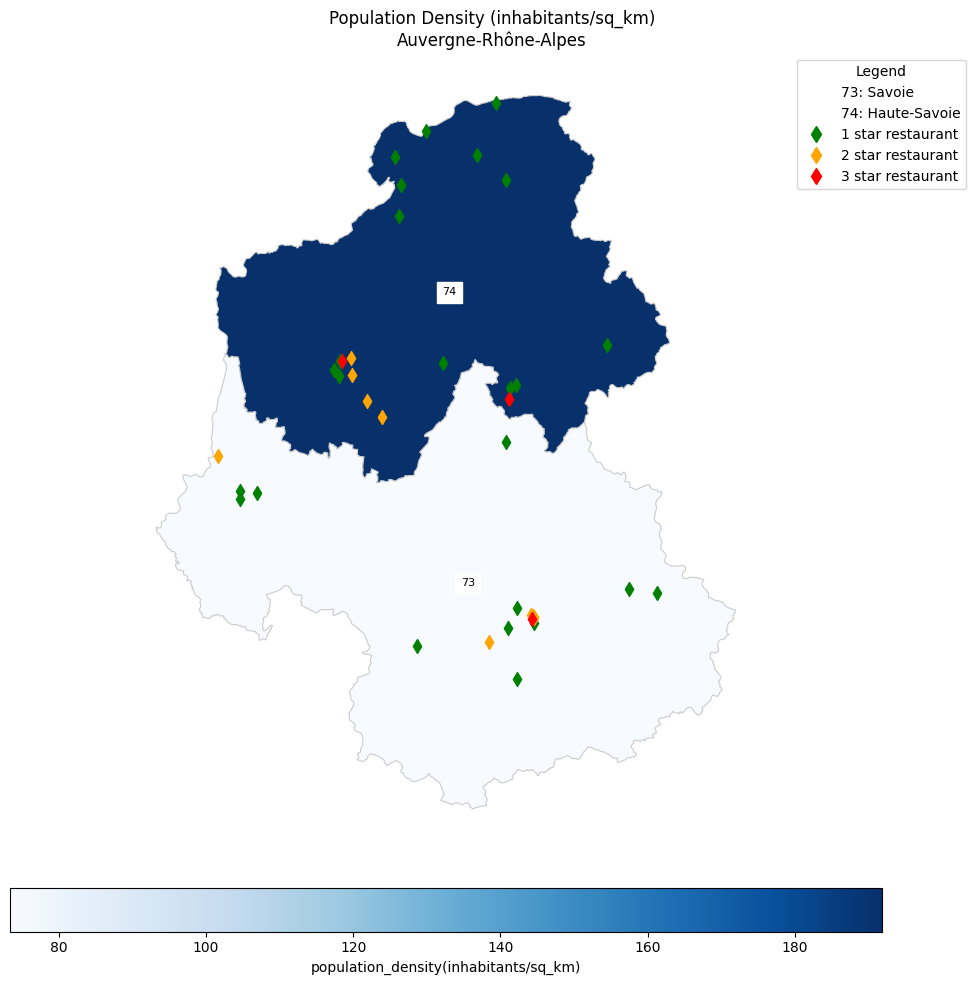

In [18]:
savoie = filter_dataframe(departments, departments=['savoie', 'haut savoie'])
plot_choropleth(savoie, column='population_density(inhabitants/sq_km)',
                title='Population Density (inhabitants/sq_km)', granularity='department',
                restaurants=True, show_legend=True)

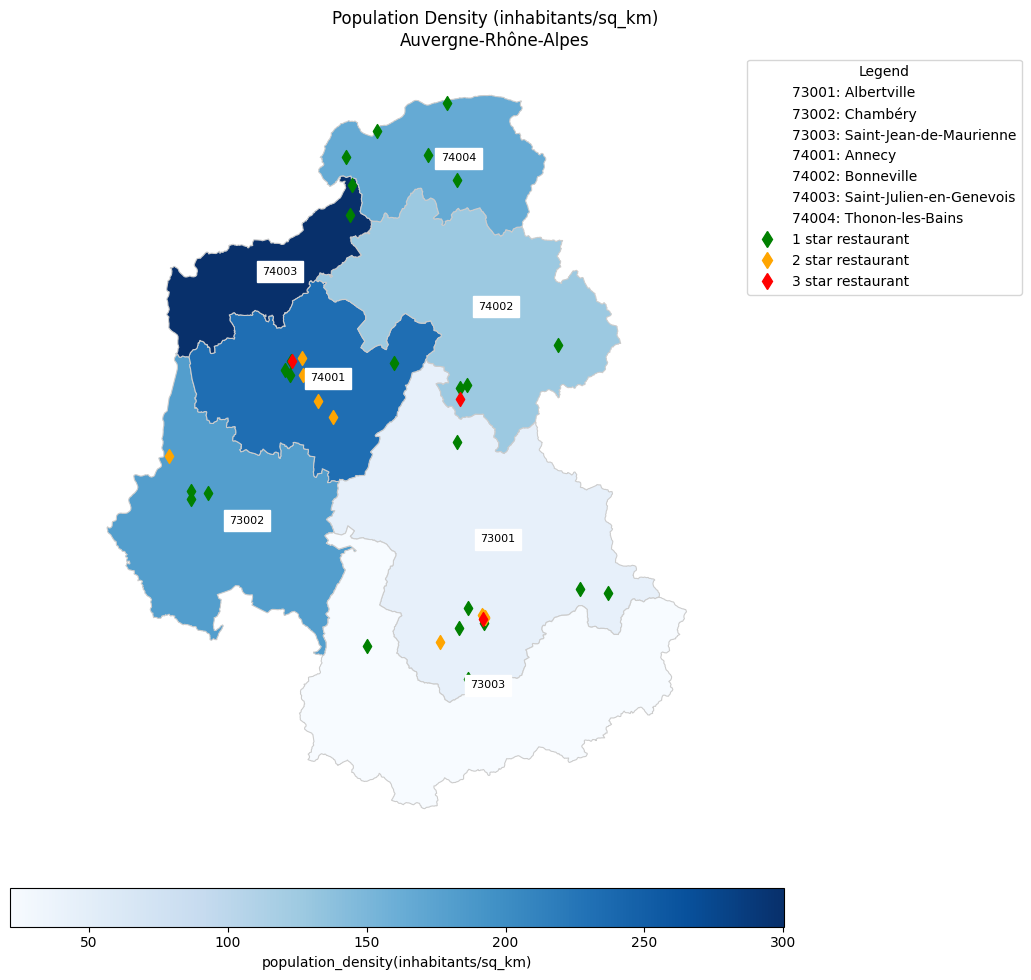

In [19]:
savoie = filter_dataframe(arrondissements, departments=['savoie', 'haut savoie'])
plot_choropleth(savoie, column='population_density(inhabitants/sq_km)',
                title='Population Density (inhabitants/sq_km)', granularity='arrondissement',
                restaurants=True, show_legend=True)

----
&nbsp;
## Nouvelle-Aquitaine

In [20]:
aquitaine = filter_dataframe(departments, regions='aquitaine')
dataframe_info(aquitaine)

GeoDataFrame.
Unique Regions: 1
Unique Departments: 12

Shape: (12, 22)


,code,department,capital,region,selected,bib_gourmand,1_star,2_star,3_star,total_stars,...,GDP_millions(€),GDP_per_capita(€),poverty_rate(%),average_annual_unemployment_rate(%),average_net_hourly_wage(€),municipal_population,population_density(inhabitants/sq_km),area(sq_km),locations,geometry
17,16,Charente,Angoulême,Nouvelle-Aquitaine,6,2,6,0,0,6,...,10580.40,30091.89,15.1,6.9,14.77,351603.0,58.9,5969.49,"{'Selected': [(45.824475, 0.4511441), (45.6929...","POLYGON ((-0.10294 45.96966, -0.09758 45.97113..."
18,17,Charente-Maritime,La Rochelle,Nouvelle-Aquitaine,23,6,2,0,1,5,...,16887.80,25275.08,12.5,6.8,14.81,668160.0,96.4,6931.12,"{'Selected': [(46.0750236, -1.0934672), (46.16...","MULTIPOLYGON (((-1.11427 45.95173, -1.1163 45...."
20,19,Corrèze,Tulle,Nouvelle-Aquitaine,6,5,2,0,0,2,...,6115.33,25467.81,13.7,6.0,14.27,240120.0,40.9,5870.90,"{'Selected': [(45.166884, 1.5315843), (44.9787...","POLYGON ((1.89873 45.69828, 1.89931 45.69828, ..."


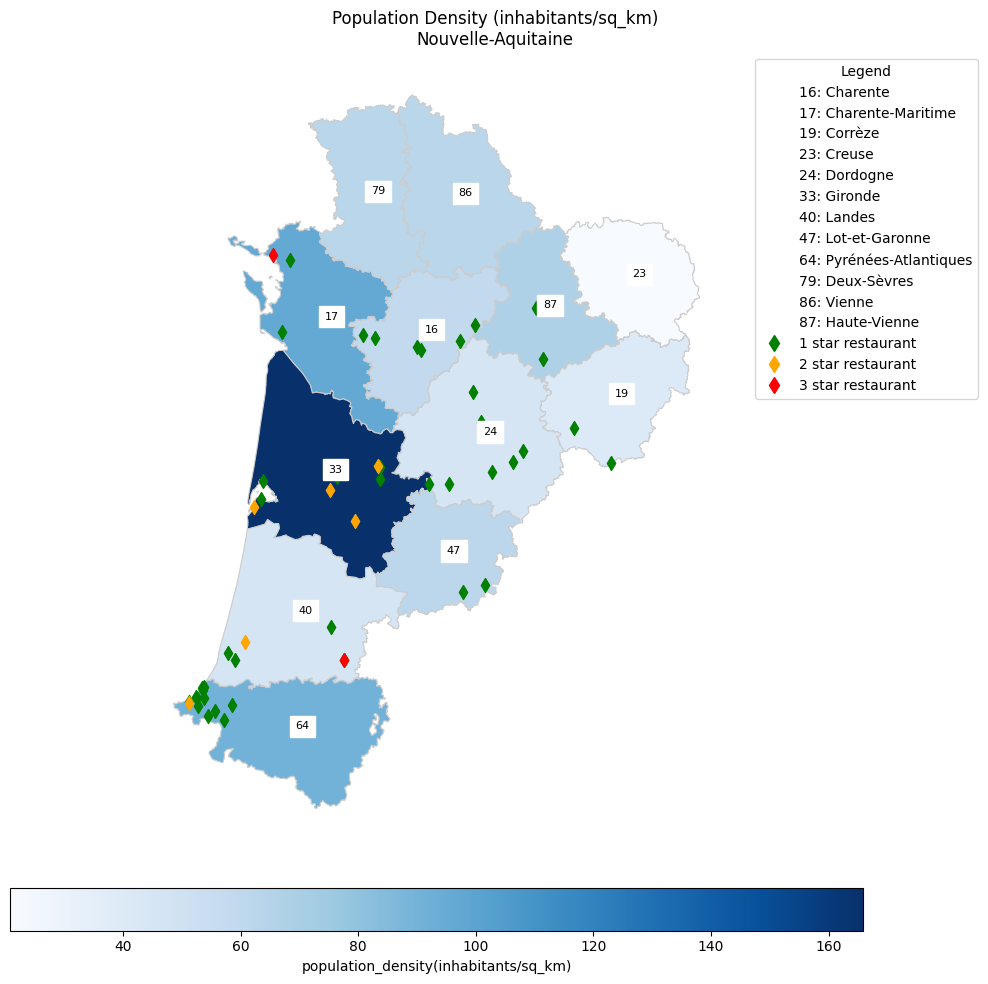

In [21]:
plot_choropleth(aquitaine, column='population_density(inhabitants/sq_km)',
                title='Population Density (inhabitants/sq_km)', granularity='department',
                restaurants=True, show_legend=True)

#### Zoom in Atlantic Coast

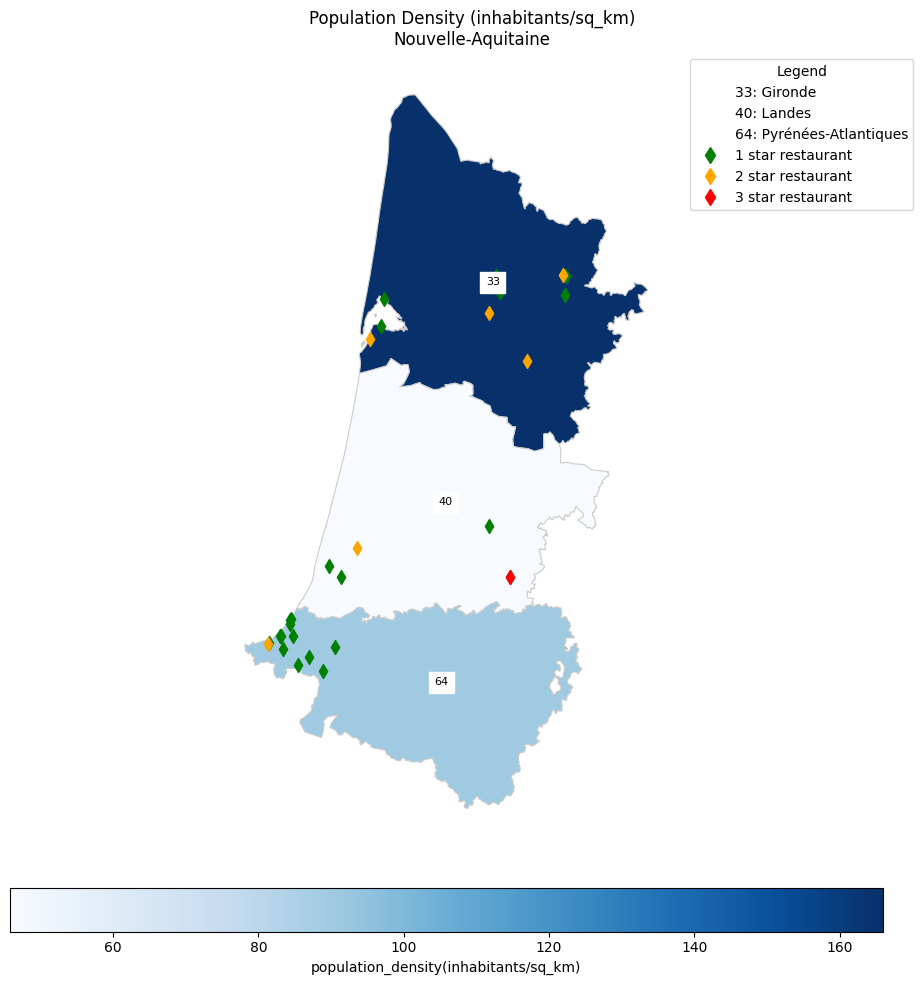

In [22]:
# Whole departments
atlantic = filter_dataframe(departments, departments=['gironde', 'landes', 'pyrennes atlantique'])
plot_choropleth(atlantic, column='population_density(inhabitants/sq_km)',
                title='Population Density (inhabitants/sq_km)', granularity='department',
                restaurants=True, show_legend=True)

#### Zoom in Gironde
(Arrondissement level)

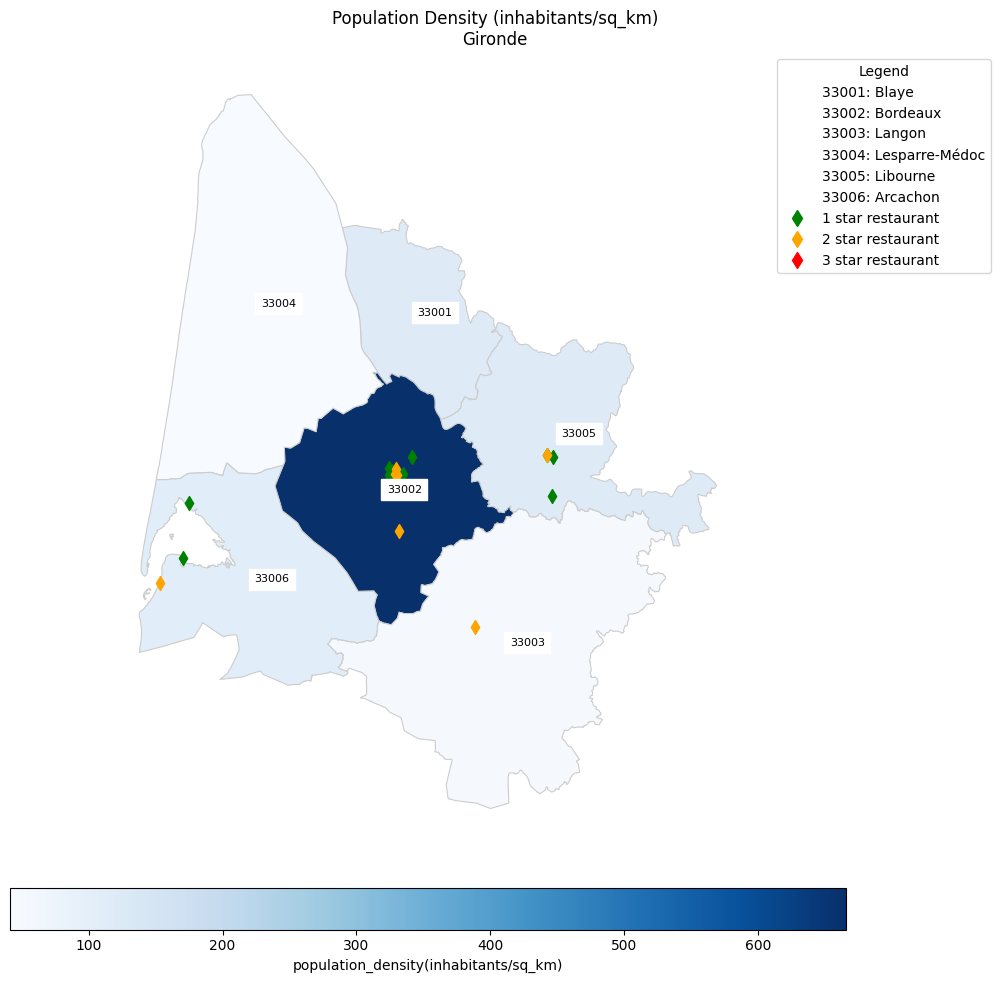

In [23]:
gironde = filter_dataframe(arrondissements, departments=['gironde'])
plot_choropleth(gironde, column='population_density(inhabitants/sq_km)',
                title='Population Density (inhabitants/sq_km)', granularity='arrondissement',
                restaurants=True, show_legend=True)

---

### `plot_area_info` function

Plots Michelin Starred Restaurants on a map for a specified department or arrondissement and optionally displays related demographic and restaurant-specific info.

**Arguments**:

- `geo_df` (GeoDataFrame): Geospatial dataframe containing boundaries and statistics.
- `data_df` (DataFrame): Dataframe containing restaurant information 
- `code_or_name` (str or int): The name of the department/arrondissement or the code. 
- `display_restaurants` (bool, optional): If True, plots the location of Michelin Starred Restaurants on the map. Default is True.
- `display_info` (bool, optional): If True, prints additional info for each restaurant. Default is False.
- `figsize` (tuple, optional): Size of the plotted map. Default is (10, 10).

**Returns**:

- None: Displays a map and prints relevant demographic and restaurant-specific info.

1. **Visualization**: The function plots the department with its restaurants, color-coding based on Michelin star rating (1 to 3 stars).
2. **Demographics**: Displays statistics like population, GDP per capita, unemployment rate, and more for the chosen department.
3. **Starred Restaurants**: Lists out Michelin starred restaurants in the department. If `display_info` is set to True, detailed information for each restaurant is printed, including the address, cuisine style, and website.

##### Usage:

```python
plot_area_info(geo_df=arrondissements, data_df=all_france, code_or_name='Nice', display_restaurants=True, display_info=True)
```


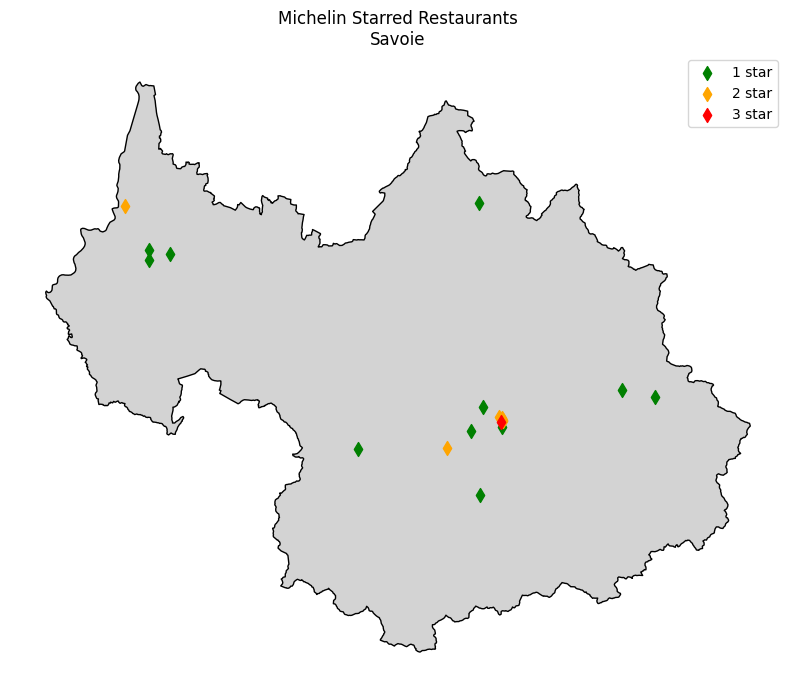

Demographics of Savoie:

Region: Auvergne-Rhône-Alpes 
Capital: Chambéry 
Municipal Population: 445288.0 
Population Density(inhabitants/sq Km): 73.4 
Area(sq Km): 6066.59 
Average Net Hourly Wage(€): 16.32 
Poverty Rate(%): 11.2 
Average Annual Unemployment Rate(%): 5.2 
GDP Per Capita(€): 34136.56 




1 ⭐⭐⭐ Restaurant:





6 ⭐⭐ Restaurants:





11 ⭐ Restaurants:



In [24]:
plot_area_info(departments, all_france, '73', display_info=True)

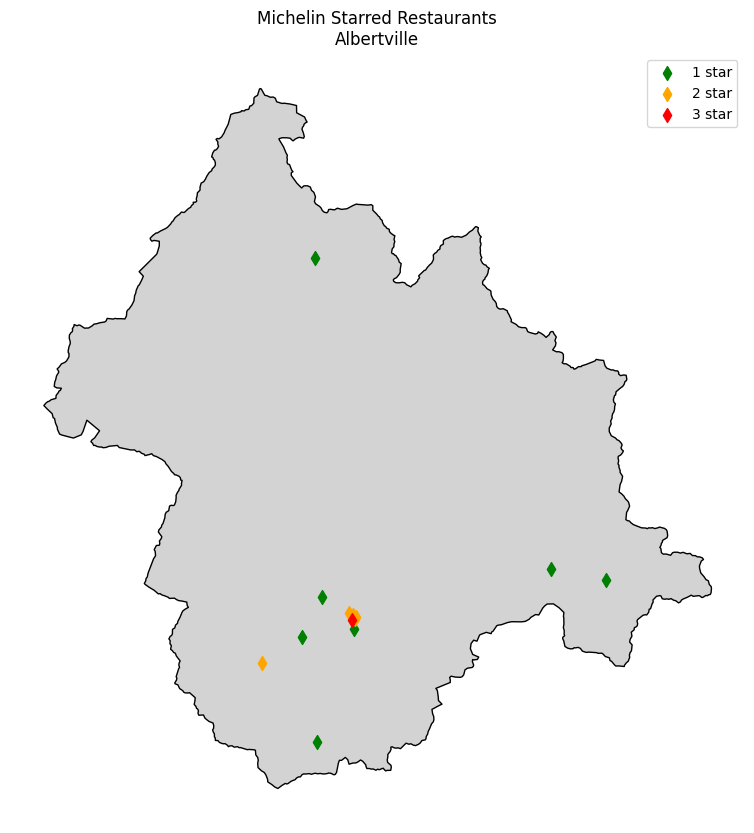

Demographics of Albertville:

Region: Auvergne-Rhône-Alpes 
Capital: Chambéry 
Municipal Population: 112282.0 
Population Density(inhabitants/sq Km): 45.5 
Average Net Hourly Wage(€): 15.8 
Poverty Rate(%): 12.8 




1 ⭐⭐⭐ Restaurant:


5 ⭐⭐ Restaurants:


7 ⭐ Restaurants:




In [25]:
plot_area_info(arrondissements, all_france, 'albertville', display_info=False)

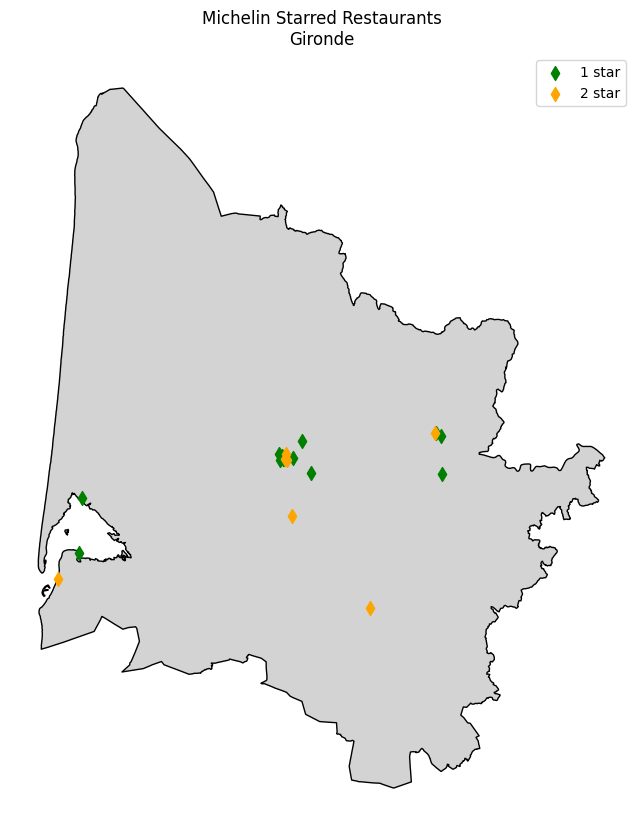

Demographics of Gironde:

Region: Nouvelle-Aquitaine 
Capital: Bordeaux 
Municipal Population: 1674980.0 
Population Density(inhabitants/sq Km): 165.9 
Area(sq Km): 10096.32 
Average Net Hourly Wage(€): 16.7 
Poverty Rate(%): 12.8 
Average Annual Unemployment Rate(%): 6.5 
GDP Per Capita(€): 33365.83 




7 ⭐⭐ Restaurants:





14 ⭐ Restaurants:



In [26]:
plot_area_info(departments, all_france, '33', display_info=True)

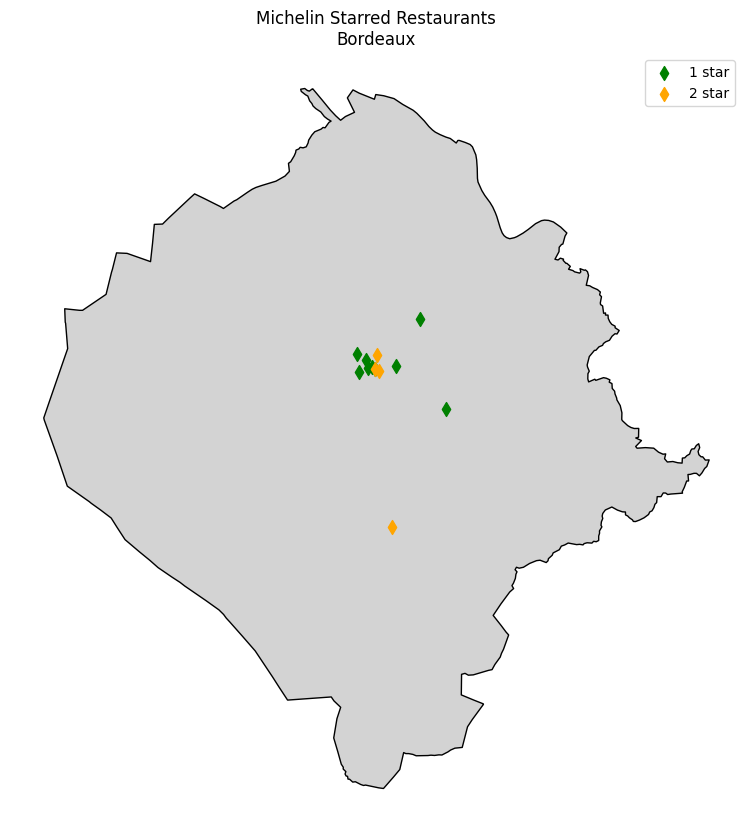

Demographics of Bordeaux:

Region: Nouvelle-Aquitaine 
Capital: Bordeaux 
Municipal Population: 1027237.0 
Population Density(inhabitants/sq Km): 665.7 
Average Net Hourly Wage(€): 17.42 
Poverty Rate(%): 12.9 




4 ⭐⭐ Restaurants:


9 ⭐ Restaurants:




In [27]:
plot_area_info(arrondissements, all_france, 'bordeaux', display_info=False)

The function also handles departments with zero starred restaurants

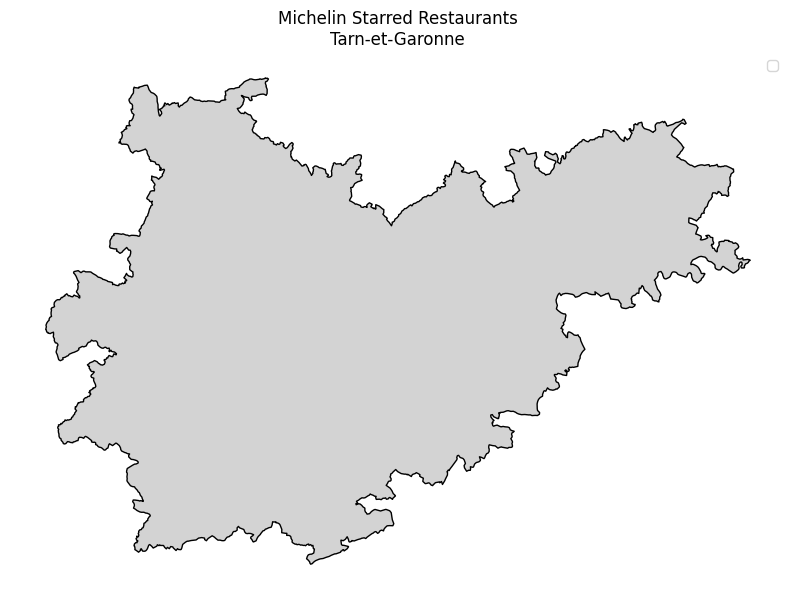

Demographics of Tarn-et-Garonne:

Region: Occitanie 
Capital: Montauban 
Municipal Population: 264924.0 
Population Density(inhabitants/sq Km): 70.8 
Area(sq Km): 3741.86 
Average Net Hourly Wage(€): 14.58 
Poverty Rate(%): 16.7 
Average Annual Unemployment Rate(%): 8.6 
GDP Per Capita(€): 22800.69 






In [28]:
plot_area_info(departments, all_france, '82', display_info=True)

----
&nbsp;
# [Michelin App](https://www.restaurant-guide-france.net)

Built using Dash, the app integrates data visualization with Plotly to display Michelin-rated restaurants across French departments sourced from CSV and GeoJSON files.

It provides an interactive map that adjusts based on user input from dropdowns, showing different restaurant ratings color-coded by star count, and utilizes hover features to present detailed information about each establishment.

it employs Dash Bootstrap Components and integrates dynamic callbacks to update visualizations in real-time.